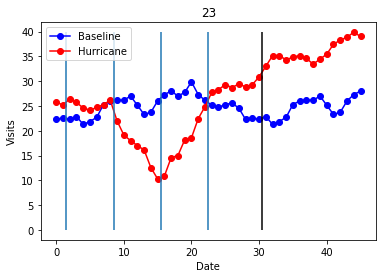

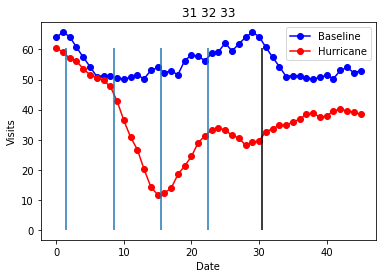

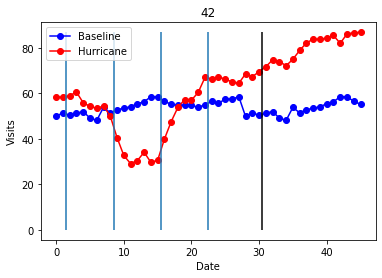

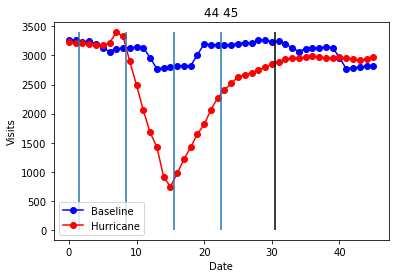

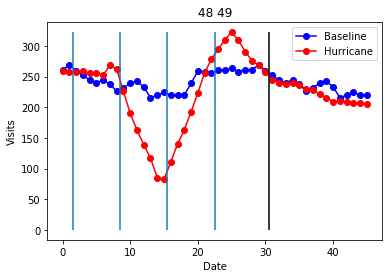

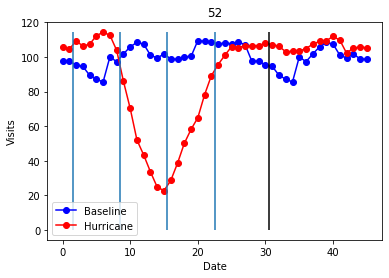

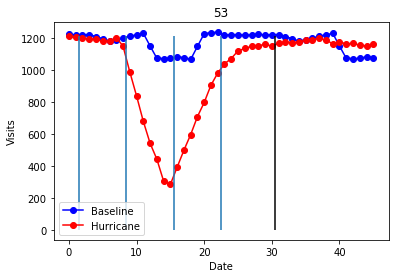

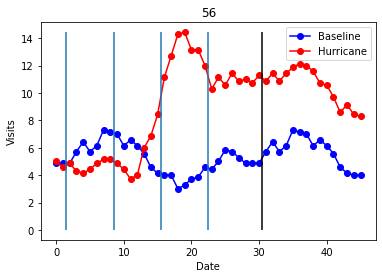

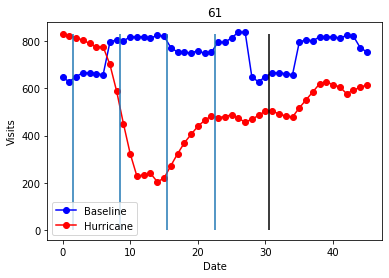

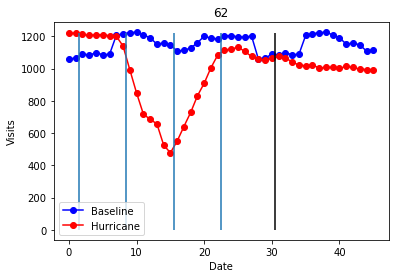

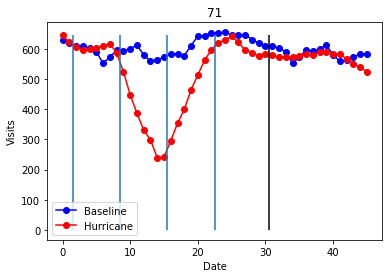

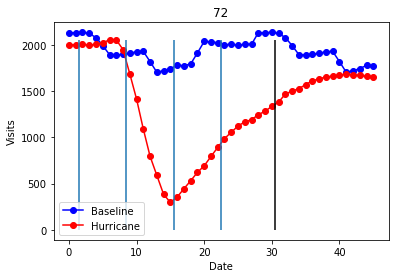

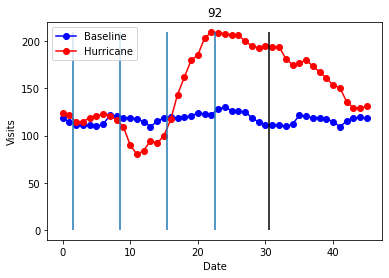

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Cities: Panama_city, Panama_city_beach, Tallahassee, Pensacola
city = 'Panama_city'

data_2018_08 = pd.read_excel(city + '_2018_08.xlsx','Sheet1')
data_2018_09 = pd.read_excel(city + '_2018_09.xlsx','Sheet1')
data_2018_10 = pd.read_excel(city + '_2018_10.xlsx','Sheet1')
data_2018_11 = pd.read_excel(city + '_2018_11.xlsx','Sheet1')
data_2018_08 = data_2018_08[['category','visits_by_day']]
data_2018_09 = data_2018_09[['category','visits_by_day']]
data_2018_10 = data_2018_10[['category','visits_by_day']]
data_2018_11 = data_2018_11[['category','visits_by_day']]

#Change category
category = [[23],[31,32,33],[42],[44,45],[48,49],[52],[53],[56],[61],[62],[71],[72],[92]]

for k in range(len(category)):
    #Visits for baseline
    df_08 = data_2018_08[data_2018_08['category'].isin(category[k])].reset_index()
    df_09 = data_2018_09[data_2018_09['category'].isin(category[k])].reset_index()
    
    visits_08, visits_09 = [0] * 31, [0] * 30
    for i in range(len(df_08)):
        visits_08 = np.sum([visits_08, eval(df_08['visits_by_day'][i])], axis=0)
    for i in range(len(df_09)):
        visits_09 = np.sum([visits_09, eval(df_09['visits_by_day'][i])], axis=0)
    
    visits_ba = list(visits_08[-4:]) + list(visits_09)
    df_visits_ba = pd.DataFrame({'visits_ba': visits_ba}).rolling(7).mean()
    visits_ba = df_visits_ba['visits_ba'].tolist()[6:]
    visits_ba = visits_ba + visits_ba[0:18]
    
    #Visits for hurricane
    df_10 = data_2018_10[data_2018_10['category'].isin(category[k])].reset_index()
    df_11 = data_2018_11[data_2018_11['category'].isin(category[k])].reset_index()
    
    visits_10, visits_11 = [0] * 31, [0] * 30
    for i in range(len(df_10)):
        visits_10 = np.sum([visits_10, eval(df_10['visits_by_day'][i])], axis=0)
    for i in range(len(df_11)):
        visits_11 = np.sum([visits_11, eval(df_11['visits_by_day'][i])], axis=0)
    
    visits = list(visits_09[-6:]) + list(visits_10) + list(visits_11)[0:15]
    df_visits = pd.DataFrame({'visits': visits}).rolling(7).mean()
    visits = df_visits['visits'].tolist()[6:]
    
    #Visualization
    plt.plot(range(46), visits_ba, 'o-', label = 'Baseline', color = 'b')
    plt.plot(range(46), visits, 'o-', label = 'Hurricane', color = 'r')
    
    plt.vlines(1.5, 0, max(visits))
    plt.vlines(8.5, 0, max(visits))
    plt.vlines(15.5, 0, max(visits))
    plt.vlines(22.5, 0, max(visits))
    plt.vlines(30.5, 0, max(visits), 'k')
    
    plt.xlabel('Date')
    plt.ylabel('Visits')
    plt.title(' '.join(map(str, category[k])))
    plt.legend()
    plt.savefig(' '.join(map(str, category[k])) + '.png')
    plt.show()